In [1]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

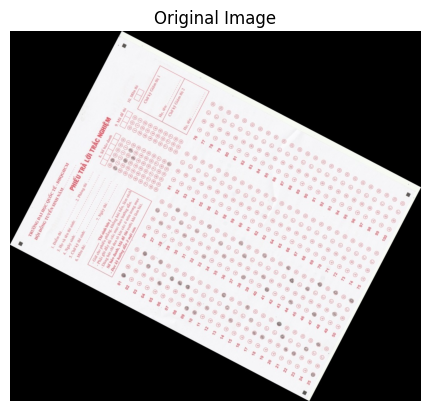

In [2]:
img = cv2.imread('/content/DIP Lab 5 Material.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

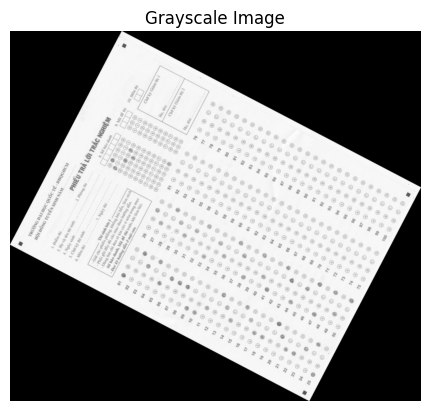

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

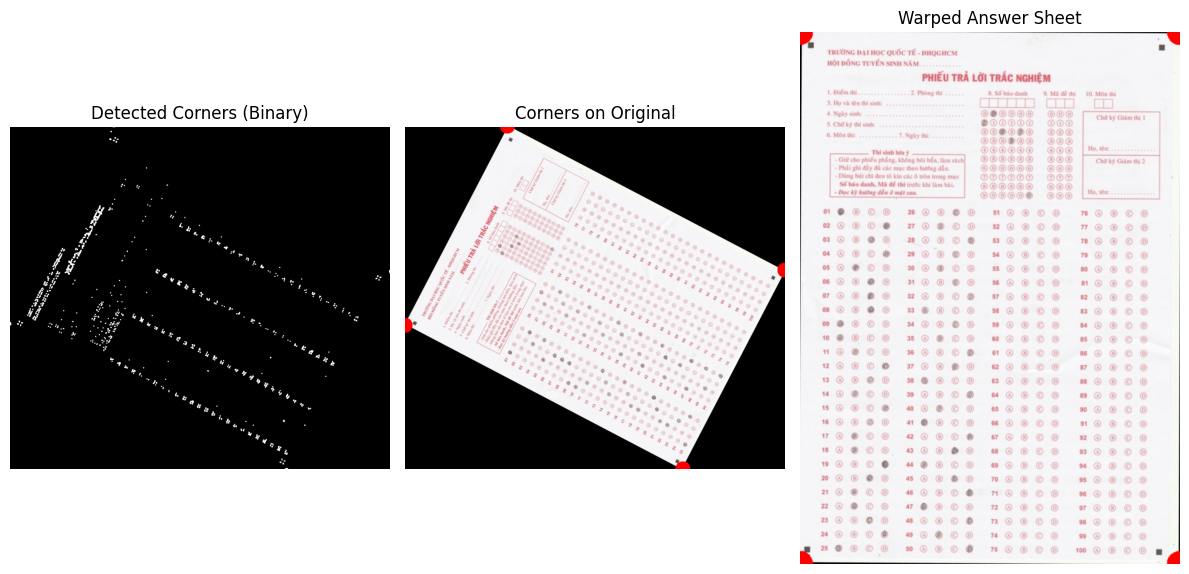

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = img.copy()
gray_float = np.float32(img_gray)
dst = cv2.cornerHarris(gray_float, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

corner_img = np.zeros_like(img_gray)
corner_img[dst > 0.01 * dst.max()] = 255

corner_points = np.argwhere(dst > 0.01 * dst.max())
corner_points = np.flip(corner_points, axis=1)  # (x, y)

hull = cv2.convexHull(corner_points)
epsilon = 0.02 * cv2.arcLength(hull, True)
approx = cv2.approxPolyDP(hull, epsilon, True)

if len(approx) != 4:
    raise ValueError("Could not find exactly 4 corners. Try adjusting epsilon or check the input image.")

def order_points(pts):
    pts = pts.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)

    rect[0] = pts[np.argmin(s)]     # top-left
    rect[2] = pts[np.argmax(s)]     # bottom-right
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left

    return rect

ordered_pts = order_points(approx)
(tl, tr, br, bl) = ordered_pts

widthA = np.linalg.norm(br - bl)
widthB = np.linalg.norm(tr - tl)
maxWidth = int(max(widthA, widthB))

heightA = np.linalg.norm(tr - br)
heightB = np.linalg.norm(tl - bl)
maxHeight = int(max(heightA, heightB))

dst_pts = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]
], dtype="float32")

M = cv2.getPerspectiveTransform(ordered_pts, dst_pts)
warped = cv2.warpPerspective(original, M, (maxWidth, maxHeight))

if maxWidth > maxHeight:
    warped = cv2.rotate(warped, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(corner_img, cmap='gray')
plt.title("Detected Corners (Binary)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Corners on Original")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Warped Answer Sheet")
plt.imshow(warped)
plt.axis('off')

plt.tight_layout()
plt.show()
